In [14]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████▏   | 777.2 MB 122.6 MB/s eta 0:00:01��▎              | 476.8 MB 63.5 MB/s eta 0:00:07 ███████████████████▋       | 679.1 MB 124.6 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 881.0 MB 59.8 MB/s eta 0:00:01      |████████████████████████████████| 881.9 MB 11 kB/s               
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [27]:
# GPU setting

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(torch.cuda.get_device_name(0)) #Google colab = TESLA T4import torch


Tesla T4


In [6]:
import torch
import random
import torch.backends.cudnn as cudnn

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)

In [7]:
 # Data load

df = pd.read_csv('경기도_clustered1.csv',encoding = 'cp949')

cluster = pd.read_csv('경기도_clustered1.csv',encoding = 'cp949',index_col = 0)
cluster

,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,이천시,안성시,김포시,화성시,광주시,양주시,여주시,포천시,의왕시,오산시
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,63.4,67.8,77.7,60.5,68.1,53.0,92.6,92.6,66.8,69.5,...,89.2,92.6,71.1,73.0,82.4,82.0,102.8,93.6,59.7,83.2
2013-02-01,63.3,67.2,77.4,60.2,67.7,52.9,92.5,90.9,66.6,69.0,...,89.4,92.8,70.9,72.9,82.0,81.7,102.8,93.6,59.1,83.0
2013-03-01,63.2,66.9,76.9,60.0,67.4,52.6,92.4,90.1,66.3,68.6,...,89.7,92.8,70.8,72.8,81.9,81.4,102.7,93.6,58.7,82.9
2013-04-01,63.3,67.1,76.4,59.8,67.4,52.6,92.4,90.0,66.3,68.1,...,90.1,93.5,70.7,73.2,82.3,81.7,102.7,93.9,58.6,82.9
2013-05-01,63.4,67.5,76.4,59.6,67.6,52.9,92.4,89.8,66.6,68.1,...,90.4,93.8,71.0,73.6,82.3,81.9,103.6,94.7,58.8,82.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,109.5,104.8,107.2,111.7,110.2,107.3,113.2,107.7,110.7,107.6,...,110.3,114.8,105.3,111.6,107.9,109.5,106.6,108.4,112.9,115.9
2021-12-01,109.8,105.1,107.4,112.0,110.8,107.4,114.1,107.5,111.2,108.0,...,112.3,116.1,105.6,111.6,108.4,109.8,107.2,109.0,113.0,116.7
2022-01-01,109.8,105.1,107.4,111.8,110.8,107.3,114.3,107.5,111.3,108.1,...,113.3,116.9,105.6,111.5,108.7,109.8,107.1,109.2,113.0,116.8


In [8]:
data = pd.read_csv('경기도변수.csv')
feature = pd.read_csv('경기도변수.csv',index_col = 0)

data

,date,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
0,2013-01-01,73.5,64.75625,93.900000,80.1,102.868,92.728,5.78,82.689331,76.007636,1089.0,1841.1,1961.90,503.67,8413721.0,54632,13631
1,2013-02-01,73.2,64.42500,93.666667,79.8,90.009,93.038,5.66,82.871183,76.108044,1083.0,1857.1,2026.50,535.87,7268443.0,65640,14925
2,2013-03-01,73.1,64.22500,93.550000,79.6,101.388,92.952,5.54,83.162722,76.376687,1111.0,1862.4,2004.90,555.02,10160177.0,87563,17718
3,2013-04-01,73.2,64.30000,93.766667,79.5,101.295,92.823,5.42,83.554044,76.858189,1101.0,1867.7,1964.00,563.87,9757932.0,106498,22790
4,2013-05-01,73.4,64.49375,94.116667,79.6,102.313,92.823,5.24,83.797077,77.090528,1129.7,1870.3,2001.05,577.87,10837979.0,120393,25910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2021-10-01,103.5,107.45625,108.650000,108.8,114.800,103.350,3.47,102.450935,103.903947,1168.6,3543.4,2970.68,992.33,14689855.0,119686,29187
106,2021-11-01,104.1,108.45625,110.166667,109.8,119.300,103.870,3.58,102.917900,104.543227,1187.9,3594.7,2839.01,965.63,14483042.0,111172,26593
107,2021-12-01,104.4,108.79375,111.033333,110.2,126.700,104.040,3.68,103.178314,104.798091,1188.8,3620.1,2977.65,1033.98,19169150.0,101766,25669
108,2022-01-01,104.4,108.75000,111.383333,110.3,115.100,104.690,3.75,103.250891,104.790872,1205.5,3634.3,2663.34,872.87,13736304.0,87825,20544


In [9]:
train = data.copy()

In [10]:
train.corr()

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,M2,코스피,코스닥,건축허용면적,거래량 전국,거래량 경기
seoul,1.000000,0.909367,0.227910,0.773868,0.655650,0.985362,-0.788762,0.821937,0.833499,0.511194,0.983945,0.713424,0.804257,0.120689,0.277253,0.461072
Avg_1,0.909367,1.000000,0.430139,0.952320,0.659035,0.914310,-0.738248,0.859271,0.864163,0.454030,0.950728,0.825427,0.851910,0.213492,0.145921,0.223406
Avg_2,0.227910,0.430139,1.000000,0.636631,0.263814,0.316192,-0.263846,0.629858,0.605018,0.122268,0.258434,0.404361,0.410531,0.467495,-0.122293,-0.113604
Avg_3,0.773868,0.952320,0.636631,1.000000,0.617700,0.802606,-0.595459,0.829918,0.825010,0.352483,0.825879,0.833771,0.805576,0.255809,-0.000097,0.046835
MMI,0.655650,0.659035,0.263814,0.617700,1.000000,0.643640,-0.508876,0.590326,0.592166,0.225834,0.660918,0.590472,0.575644,0.370323,0.317967,0.355939
CPI,0.985362,0.914310,0.316192,0.802606,0.643640,1.000000,-0.788664,0.860513,0.867821,0.477902,0.977648,0.736793,0.800200,0.135486,0.252717,0.434781
대출금리,-0.788762,-0.738248,-0.263846,-0.595459,-0.508876,-0.788664,1.000000,-0.883444,-0.897772,-0.557470,-0.827397,-0.575287,-0.730375,-0.416933,-0.542016,-0.611001
전세가격지수 전국,0.821937,0.859271,0.629858,0.829918,0.590326,0.860513,-0.883444,1.000000,0.998765,0.444093,0.854004,0.738510,0.832382,0.455081,0.319727,0.411201
전세가격지수 경기도,0.833499,0.864163,0.605018,0.825010,0.592166,0.867821,-0.897772,0.998765,1.000000,0.466121,0.866091,0.732316,0.833379,0.448879,0.337487,0.429138
환율,0.511194,0.454030,0.122268,0.352483,0.225834,0.477902,-0.557470,0.444093,0.466121,1.000000,0.525141,0.032797,0.228263,0.166043,0.125236,0.225640


In [11]:
# Training/Test ratio = 7:3

Train_ratio = 0.7

Test_ratio = 0.3

lag 변수 생성

In [12]:
df.set_index('date', inplace=True)
data.set_index('date', inplace=True)

In [13]:
lag_col= list(df.columns)


lag_amount = 3

for col in lag_col:
    for i in range(lag_amount):
        df['{0}_lag{1}'.format(col,i+1)] = df['{}'.format(col)].shift(i+1)
        
df.dropna(inplace=True)

In [14]:
df = df.iloc[:-3,:]
df

,수원시,성남시,의정부시,안양시,부천시,광명시,평택시,동두천시,안산시,고양시,...,여주시_lag3,포천시_lag1,포천시_lag2,포천시_lag3,의왕시_lag1,의왕시_lag2,의왕시_lag3,오산시_lag1,오산시_lag2,오산시_lag3
date,,,,,,,,,,,,,,,,,,,,,
2013-04-01,63.3,67.1,76.4,59.8,67.4,52.6,92.4,90.0,66.3,68.1,...,102.8,93.6,93.6,93.6,58.7,59.1,59.7,82.9,83.0,83.2
2013-05-01,63.4,67.5,76.4,59.6,67.6,52.9,92.4,89.8,66.6,68.1,...,102.8,93.9,93.6,93.6,58.6,58.7,59.1,82.9,82.9,83.0
2013-06-01,63.5,67.9,76.2,59.5,67.6,53.0,92.6,89.6,66.8,68.0,...,102.7,94.7,93.9,93.6,58.8,58.6,58.7,82.9,82.9,82.9
2013-07-01,63.4,67.7,75.5,59.5,67.5,53.1,92.5,89.3,66.7,67.9,...,102.7,95.1,94.7,93.9,59.1,58.8,58.6,82.4,82.9,82.9
2013-08-01,63.2,67.4,75.2,59.4,67.2,52.9,92.3,89.0,66.5,67.9,...,103.6,94.7,95.1,94.7,58.7,59.1,58.8,82.1,82.4,82.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,104.7,102.6,103.8,106.2,104.5,104.0,106.2,104.5,105.0,103.1,...,99.1,101.6,100.0,97.9,103.1,100.0,96.3,103.5,100.0,96.0
2021-09-01,106.5,103.6,105.2,108.3,106.7,105.5,108.8,106.4,107.1,105.0,...,100.0,103.7,101.6,100.0,106.4,103.1,100.0,107.3,103.5,100.0
2021-10-01,108.4,104.3,106.5,110.5,108.7,106.7,111.7,107.3,109.3,106.7,...,101.1,105.8,103.7,101.6,109.1,106.4,103.1,110.7,107.3,103.5


In [15]:
lag_col= list(data.columns)


lag_amount = 3

for col in lag_col:
    for i in range(lag_amount):
        data['{0}_lag{1}'.format(col,i+1)] = data['{}'.format(col)].shift(i+1)
        
data.dropna(inplace=True)

In [16]:
data= data.iloc[:-2,:]
data

,seoul,Avg_1,Avg_2,Avg_3,MMI,CPI,대출금리,전세가격지수 전국,전세가격지수 경기도,환율,...,코스닥_lag3,건축허용면적_lag1,건축허용면적_lag2,건축허용면적_lag3,거래량 전국_lag1,거래량 전국_lag2,거래량 전국_lag3,거래량 경기_lag1,거래량 경기_lag2,거래량 경기_lag3
date,,,,,,,,,,,,,,,,,,,,,
2013-04-01,73.2,64.30000,93.766667,79.5,101.295,92.823,5.42,83.554044,76.858189,1101.0,...,503.67,10160177.0,7268443.0,8413721.0,87563.0,65640.0,54632.0,17718.0,14925.0,13631.0
2013-05-01,73.4,64.49375,94.116667,79.6,102.313,92.823,5.24,83.797077,77.090528,1129.7,...,535.87,9757932.0,10160177.0,7268443.0,106498.0,87563.0,65640.0,22790.0,17718.0,14925.0
2013-06-01,73.2,64.55000,94.300000,79.5,99.722,92.710,5.05,83.978080,77.265688,1142.0,...,555.02,10837979.0,9757932.0,10160177.0,120393.0,106498.0,87563.0,25910.0,22790.0,17718.0
2013-07-01,72.8,64.36875,94.233333,79.1,99.907,92.909,5.09,84.230581,77.474299,1123.5,...,563.87,10007009.0,10837979.0,9757932.0,160468.0,120393.0,106498.0,33741.0,25910.0,22790.0
2013-08-01,72.5,64.17500,94.083333,78.8,96.115,93.238,5.06,84.582865,77.939035,1110.0,...,577.87,11233555.0,10007009.0,10837979.0,74944.0,160468.0,120393.0,16437.0,33741.0,25910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,101.7,104.06250,104.500000,104.7,110.500,102.750,3.32,101.225843,101.991464,1159.5,...,981.78,14591577.0,16013705.0,13891755.0,140102.0,144759.0,154949.0,39146.0,38191.0,42027.0
2021-09-01,102.7,105.82500,106.616667,106.9,111.100,103.170,3.40,101.824690,102.964829,1184.0,...,1029.96,13946424.0,14591577.0,16013705.0,133495.0,140102.0,144759.0,36154.0,39146.0,38191.0
2021-10-01,103.5,107.45625,108.650000,108.8,114.800,103.350,3.47,102.450935,103.903947,1168.6,...,1031.14,14652194.0,13946424.0,14591577.0,122333.0,133495.0,140102.0,33662.0,36154.0,39146.0


데이터 공간 만들기

In [17]:
result =  pd.DataFrame(data=[0,0,0,0],
                             index = ['MAE','RMSE','MAPE', 'R2'],
                             columns=['test'])
result

,test
MAE,0
RMSE,0
MAPE,0
R2,0


In [18]:
predict =  pd.DataFrame(data=[],columns=['test'] )
predict

,test


bi_LSTM model 실행

In [ ]:
from tqdm.notebook import tqdm

for i in tqdm(range(29)):
    clust_n = int(cluster[cluster.columns[i]][-1])
    
    answer = []
    for num in range(11):
        if abs(train.corr()['Avg_{}'.format(clust_n+1)][num])>=0.7:
            answer.append(num)
    
    col =[]
    for j in  answer:
        col.append(data.columns[j])
    

    x = data[col].replace(',','')
    y = df.iloc[:,i:i+1]
    
       
    train_x = x.iloc[0:int(len(x)*Train_ratio),:]

    train_y = y.iloc[0:int(len(x)*Train_ratio),:]

    test_x = x.iloc[int(len(x)*Train_ratio):,:]

    test_y = y.iloc[int(len(x)*Train_ratio):,:]
    

    
    

    # Normalizing , 둘다 학습하여 성능비교할것

    minmax = MinMaxScaler()

    standard = StandardScaler()

    
    yscaler = minmax.fit(y.values.reshape(-1,1))
    train_x = minmax.fit_transform(train_x)

    train_y = minmax.fit_transform(train_y)

    test_x = minmax.fit_transform(test_x)

    test_y = minmax.fit_transform(test_y)





    # Numpy array상태로는 학습이 불가능하므로, Torch Variable 형태로 변경(data/grad/grad_fn)

    train_x_tensor = Variable(torch.Tensor(train_x))

    train_y_tensor = Variable(torch.Tensor(train_y))

    

    test_x_tensor = Variable(torch.Tensor(test_x))

    test_y_tensor = Variable(torch.Tensor(test_y))

    

    train_x_tensor_final = torch.reshape(train_x_tensor, (train_x_tensor.shape[0], 1, train_x_tensor.shape[1]))

    train_y_tensor_final = torch.reshape(train_y_tensor, (train_y_tensor.shape[0], 1, train_y_tensor.shape[1]))

    test_x_tensor_final = torch.reshape(test_x_tensor, (test_x_tensor.shape[0], 1, test_x_tensor.shape[1]))

    test_y_tensor_final = torch.reshape(test_y_tensor,(test_y_tensor.shape[0], 1, test_y_tensor.shape[1]) )

    


    ## LSTM network modeling

    class biLSTM(nn.Module):
        def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
            super(biLSTM, self).__init__()
            self.num_classes = num_classes
            self.num_layers = num_layers
            self.input_size = input_size
            self.hidden_size = hidden_size
            self.seq_length = seq_length

            self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, bidirectional=True, batch_first=True) 
            
            self.fc = nn.Linear(hidden_size*2, 256)
            
            
            

            self.layer_2 = nn.Linear(256,256)

            self.layer_3 = nn.Linear(256,128)

            self.layer_out = nn.Linear(128, num_classes)

            self.relu = nn.ReLU() #Activation Func

        def forward(self,x):
            h_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)).to(device)
            c_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)).to(device)
            out, _ = self.lstm(x, (h_0, c_0))
            
            out = self.fc(out[:, -1, :])
            out = self.relu(out)
            
            out = self.layer_2(out)

            out = self.relu(out)

            out = self.layer_3(out)

            out = self.relu(out)

            out = self.layer_out(out) #Output layer

            

            return out


 

    # Code Main

    num_epochs = 100000
    learning_rate = 0.005

    input_size = int(len(x.columns))

    hidden_size = 2 # number of features in hidden state

    num_layers = 1

    num_classes = int(len(y.columns))



    model = biLSTM(num_classes, input_size, hidden_size, num_layers, train_x_tensor_final.shape[1]).to(device)




    loss_function = torch.nn.MSELoss()

    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

 

    for epoch in range(num_epochs) : 

        outputs = model.forward(train_x_tensor_final.to(device))
        


        optimizer.zero_grad()

        loss = loss_function(outputs, train_y_tensor.to(device))
        

        loss.backward()

        optimizer.step() # improve from loss = back propagation

        if epoch % 100 == 0 :

            print("Epoch : %d, loss : %1.5f" % (epoch, loss.item()))
            

    # Estimated Value

    test_predict = model(test_x_tensor_final.to(device)) #Forward Pass
    


    predict_data = test_predict.data.detach().cpu().numpy() #numpy conversion

    predict_data = minmax.inverse_transform(predict_data) #inverse normalization(Min/Max)
    
    y_pred = predict_data[:,0]

    # Real Value

    real_data = test_y_tensor.data.numpy() # Real value

    real_data = minmax.inverse_transform(real_data) #inverse normalization 
    
    y_test = real_data[:,0]

    
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    MAPE= np.mean(np.abs((y_test - y_pred) / y_test))
    pd.options.display.float_format = '{:.5f}'.format
    
    label = df.columns[i]
    Result = pd.DataFrame(data=[MAE,RMSE, MAPE,R2],
                         index = ['MAE','RMSE','MAPE','R2'],
                         columns=[label])
        
    

    result = pd.concat([result,Result],axis = 1)

    DAYS_TO_PREDICT = 6
    with torch.no_grad():
        test_seq = test_x_tensor_final[:-1]
        preds = []
        for i in range(DAYS_TO_PREDICT):
            y_test_pred = model(test_seq)[-1:,0]
            pred = torch.flatten(y_test_pred).item()
            preds.append(pred)
            new_seq = test_seq.numpy().flatten()
            new_seq = np.append(new_seq, [pred])
            new_seq = new_seq[1:]
            test_seq = torch.as_tensor(new_seq).view(test_x_tensor_final[:-1].shape[0],1,test_x_tensor_final[:-1].shape[2]).float()

    # Prediction value 스케일링 역변환
    pred_values = yscaler.inverse_transform(np.array(preds).reshape(-1,1))
    pred_values

    # 예측값 반올림
    import math

    pred_values_ceiled = list(pred_values.flatten())
    predicted_cases=pred_values_ceiled
    predicted_cases

    predicted_index = pd.date_range(
      start=data.index[-1],
      periods=DAYS_TO_PREDICT + 1, freq = 'MS',
      closed='right'
    )

    predicted_index = pd.to_datetime(predicted_index, format='%Y%m%d')

    predicted_cases_i = pd.DataFrame(
      data=predicted_cases,
      index=predicted_index,
        columns = [label]
    )
    
    if not i :
        predict = predicted_cases_i
    else:
        predict =pd.concat([predict,predicted_cases_i],axis = 1)

    preds_i = pd.DataFrame(predicted_cases_i)
    feature.index = pd.to_datetime(feature.index)

    y_i = pd.DataFrame(data =df[df.columns[i]].values,index = df.index)
    y_i.index.name = ''


  0%|          | 0/29 [00:00<?, ?it/s]

Epoch : 0, loss : 0.45472
Epoch : 100, loss : 0.00056
Epoch : 200, loss : 0.00027
Epoch : 300, loss : 0.00015
Epoch : 400, loss : 0.00010
Epoch : 500, loss : 0.00008
Epoch : 600, loss : 0.00018
Epoch : 700, loss : 0.00009
Epoch : 800, loss : 0.00020
Epoch : 900, loss : 0.00011
Epoch : 1000, loss : 0.00005
Epoch : 1100, loss : 0.00004
Epoch : 1200, loss : 0.00005
Epoch : 1300, loss : 0.00021
Epoch : 1400, loss : 0.00026
Epoch : 1500, loss : 0.00004
Epoch : 1600, loss : 0.00014
Epoch : 1700, loss : 0.00010
Epoch : 1800, loss : 0.00004
Epoch : 1900, loss : 0.00004
Epoch : 2000, loss : 0.00029
Epoch : 2100, loss : 0.00018
Epoch : 2200, loss : 0.00003
Epoch : 2300, loss : 0.00006
Epoch : 2400, loss : 0.00003
Epoch : 2500, loss : 0.00004
Epoch : 2600, loss : 0.00005
Epoch : 2700, loss : 0.00002
Epoch : 2800, loss : 0.00002
Epoch : 2900, loss : 0.00004
Epoch : 3000, loss : 0.00007
Epoch : 3100, loss : 0.00002
Epoch : 3200, loss : 0.00002
Epoch : 3300, loss : 0.00003
Epoch : 3400, loss : 0.000

In [ ]:
del result['test']
result.to_csv('평가지표-bi.csv',encoding='cp949')
result

In [ ]:
del predict['test']
predict.to_csv('예측치-bi.csv',encoding='cp949')
predict

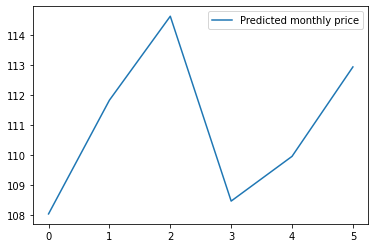

In [67]:
plt.plot(predicted_cases, label='Predicted monthly price')
plt.legend();

In [ ]:
plt.figure(figsize=(100,50))
plt.plot(y_3,label='real')
plt.plot(preds_3, label='predict')
plt.xticks(rotation=90)


plt.legend()